### Optical Recognition Handwritten Digits ###

In [194]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [164]:
nist = fetch_openml('optdigits', version=1, as_frame=False, parser='auto')
x = nist.data
y = nist.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Manual Perceptron ###

In [197]:
class ManualPerceptron:
    """
    Perceptron implementation that replicates sklearn's Perceptron
    """
    
    def __init__(self, X, y, learning_rate=1.0, epochs=200):
        self.X = X

        #instead of y being a scalar, it is a one-hot encoded vector
        self.y = np.eye(10)[y.astype(int)]
        self.input_size = X.shape[1]
        self.output_size = self.y.shape[1]
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights, self.bias = self._initialize_weights()
        
    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)
    
    def _initialize_weights(self):
        weights = np.zeros((self.output_size, self.input_size))
        bias = np.zeros(self.output_size)
        return weights, bias

    def _feedforward(self, X):
        z = np.dot(X, self.weights.T) + self.bias  
        return z
    
    def fit(self ,X, y):
        errors = []
        if y.ndim == 1:
            y = np.eye(10)[y.astype(int)]
        
        print("Training.....")

        for epoch in range(self.epochs):

            z = self._feedforward(X)  
            y_pred = self._step_function(z)

            weight_gradients = np.dot((y - y_pred).T, X) 
            bias_gradients = np.sum(y - y_pred, axis=0) 
            

            errors.append(np.sum(y_pred != y))
        
            self.weights += self.learning_rate * weight_gradients
            self.bias += self.learning_rate * bias_gradients

            if np.sum(y_pred != y) == 0:
                break
        self.errors = errors

        return None
    
    def predict(self, X):
        """Make predictions"""
        z = self._feedforward(X)
        y_pred = self._step_function(z)
        return y_pred

In [198]:
perceptron = ManualPerceptron(X_train, y_train)

In [167]:
perceptron.fit(X_train, y_train)

Training.....


### Training Errors ####

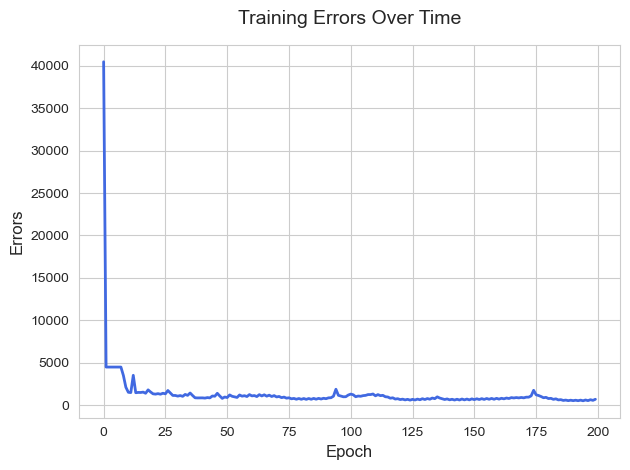

In [168]:
sns.set_style("whitegrid")
sns.lineplot(data=perceptron.errors, color='royalblue', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Errors', fontsize=12)
plt.title('Training Errors Over Time', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

In [169]:
y_pred = np.argmax(perceptron.predict(X_test), axis=1)
accuracy_score(y_test.astype(int), y_pred)


0.8798932384341637

## Sklearn Perceptron

In [170]:
sklearn_perceptron = Perceptron(random_state=42, max_iter=200)
sklearn_perceptron.fit(X_train, y_train)

Perceptron(max_iter=200, random_state=42)

The sklearn module was slighty better, with 6 percentual points more of accuracy 

In [171]:

sklearn_y_pred = sklearn_perceptron.predict(X_test)
sklearn_accuracy = accuracy_score(y_test.astype(int), sklearn_y_pred.astype(int))
sklearn_accuracy

0.943950177935943

### MLP ###

In [172]:
y_train_cat = np.eye(10)[y_train.astype(int)]
y_test_cat = np.eye(10)[y_test.astype(int)]

In [ ]:
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(64,)),  
    Dense(64, activation='relu'),                      
    Dense(32, activation='relu'),                      
    Dense(10, activation='softmax')                   
])

mlp_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = mlp_model.fit(
    X_train, y_train_cat,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
  1/141 [..............................] - ETA: 20s - loss: 5.9469 - accuracy: 0.1562

2025-09-07 15:21:47.408083: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


141/141 [==============================] - 0s 1ms/step - loss: 0.8597 - accuracy: 0.7642 - val_loss: 0.2426 - val_accuracy: 0.9279
Epoch 2/100
141/141 [==============================] - 0s 781us/step - loss: 0.1515 - accuracy: 0.9580 - val_loss: 0.1400 - val_accuracy: 0.9555
Epoch 3/100
141/141 [==============================] - 0s 797us/step - loss: 0.0937 - accuracy: 0.9709 - val_loss: 0.1060 - val_accuracy: 0.9635
Epoch 4/100
141/141 [==============================] - 0s 747us/step - loss: 0.0617 - accuracy: 0.9824 - val_loss: 0.1051 - val_accuracy: 0.9698
Epoch 5/100
141/141 [==============================] - 0s 737us/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0800 - val_accuracy: 0.9760
Epoch 6/100
141/141 [==============================] - 0s 744us/step - loss: 0.0401 - accuracy: 0.9855 - val_loss: 0.0797 - val_accuracy: 0.9751
Epoch 7/100
141/141 [==============================] - 0s 742us/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0772 - val_accuracy: 0.9778

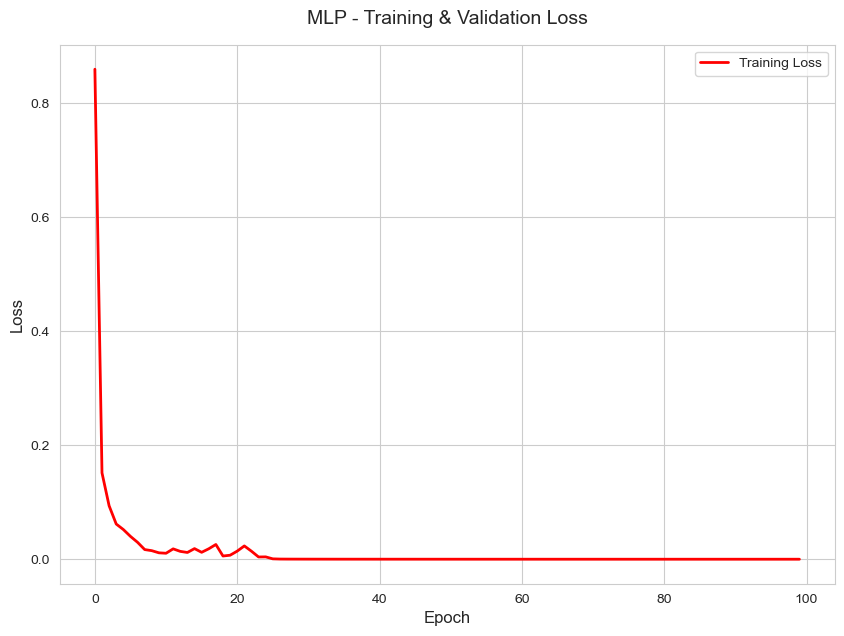

In [183]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss', color='red', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('MLP - Training & Validation Loss', fontsize=14, pad=15)
plt.legend()

MLP is way better

In [178]:
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)
accuracy_score(y_test.astype(int), y_pred)

36/36 [==============================] - 0s 339us/step


0.9866548042704626

### SVM ###

In [191]:
svc_model = SVC(kernel='rbf', random_state=42, C=1.0)
svc_model.fit(X_train, y_train.astype(int))

SVC(random_state=42)

In [192]:
svc_y_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test.astype(int), svc_y_pred)
svc_accuracy

0.9902135231316725

### Random Forest ###

In [195]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train.astype(int))

RandomForestClassifier(max_depth=10, random_state=42)

In [196]:
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test.astype(int), rf_y_pred)
rf_accuracy

0.9750889679715302